# LOAN APPROVAL PREDICTION

In [1]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the dataset
data = pd.read_csv("loan_data_set.csv")

In [3]:
# make a copy of original data
data_original = data.copy()

In [4]:
# take a look at the top 5 rows of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# show the shape of the dataset i.e. no of rows, no of columns
data.shape

(614, 13)

In [6]:
# take a look at the features (i.e. independent variables) in the dataset
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
# show the data types for each column of the train set
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
# concise summary of the dataset, info about index dtype, column dtypes, non-null values and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Exploratory Data Analysis

## Univariate Analysis

### Target Variable (Categorical)

In [9]:
# frequency table of a variable will give us the count of each category in that variable
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
# percentage distribution can be calculated by setting the normalize=True to show proportions instead of number 
data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

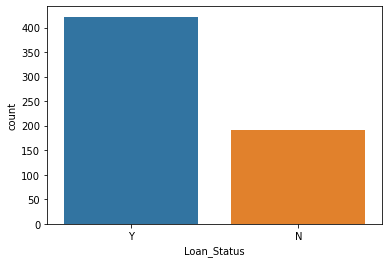

In [11]:
# countplot to visualize the frequency
sns.countplot(data['Loan_Status'])

### Independent Variable (Categorical)

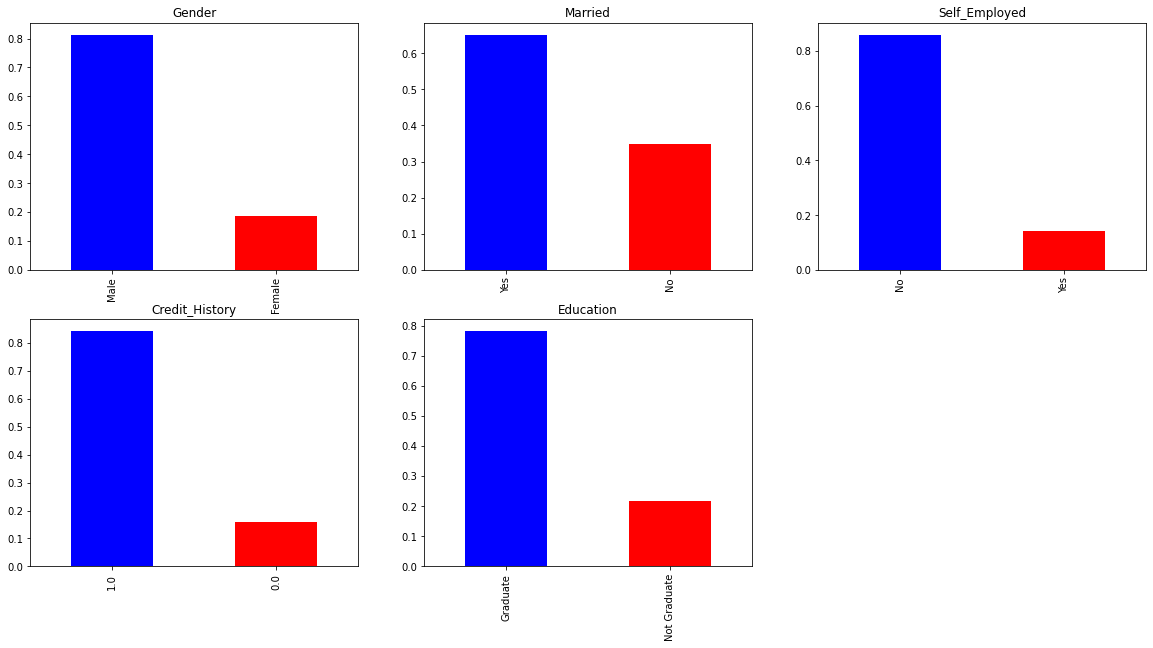

In [12]:
# Visualizing categorical features

plt.subplot(231)
data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender', color=['blue','red'])

plt.subplot(232)
data['Married'].value_counts(normalize=True).plot.bar(title= 'Married', color=['blue','red'])

plt.subplot(233)
data['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed', color=['blue','red'])

plt.subplot(234)
data['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History', color=['blue','red'])

plt.subplot(235)
data['Education'].value_counts(normalize=True).plot.bar(title= 'Education', color=['blue','red'])

plt.show()

### Independent Variable (Ordinal)

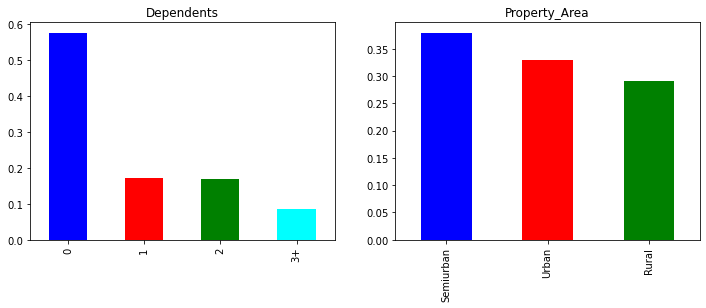

In [13]:
# Visualizing remaining categorical features

plt.subplot(121)
data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents', color=['blue','red','green','cyan'])

plt.subplot(122)
data['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area', color=['blue','red','green'])

plt.show()

### Independent Variable (Numerical)

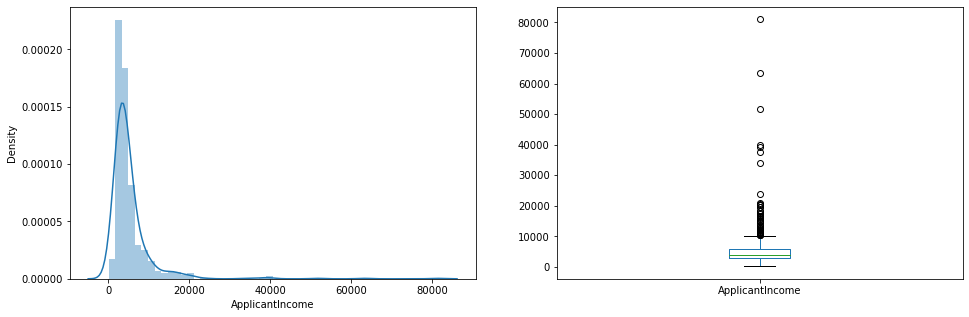

In [14]:
# Visualizing ApplicantIncome

plt.subplot(121)
sns.distplot(data['ApplicantIncome'])

plt.subplot(122)
data['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Text(0.5, 0.98, '')

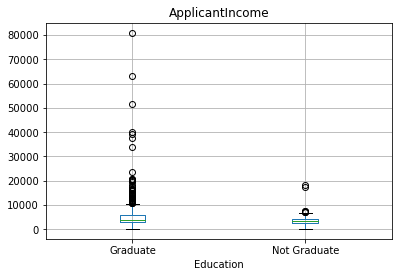

In [15]:
data.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

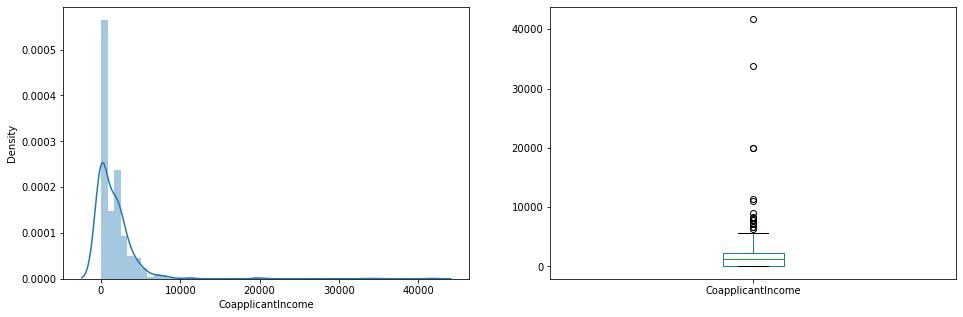

In [16]:
# Visualizing CoapplicantIncome

plt.subplot(121)
sns.distplot(data['CoapplicantIncome'])

plt.subplot(122)
data['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

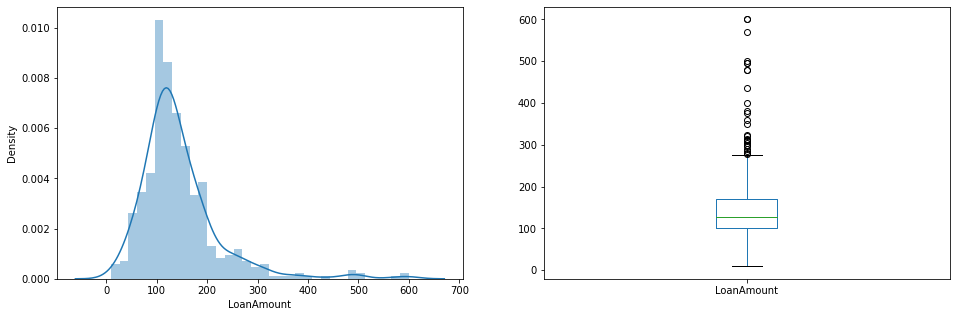

In [17]:
# Visualizing LoanAmount

plt.subplot(121)
df=data.dropna()
sns.distplot(df['LoanAmount'])

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

In [18]:
# frequency table of a variable will give us the count of each category in that variable
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:title={'center':'Loan_Amount_Term'}>

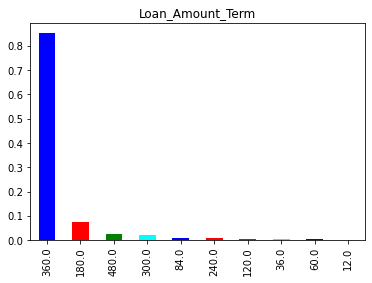

In [19]:
# plot bar chart
data['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term', color=['blue','red','green','cyan'])

## Bivariate Analysis

### Categorical Independent Variable vs Target Variable

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


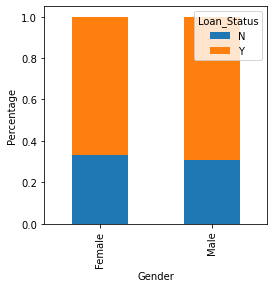

In [20]:
print(pd.crosstab(data['Gender'],data['Loan_Status']))

Gender = pd.crosstab(data['Gender'],data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


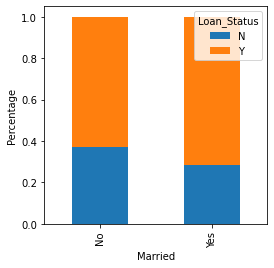

In [21]:
print(pd.crosstab(data['Married'],data['Loan_Status']))

Married = pd.crosstab(data['Married'],data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


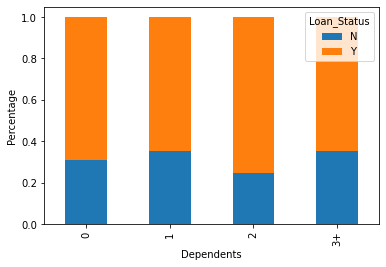

In [22]:
print(pd.crosstab(data['Dependents'],data['Loan_Status']))

Dependents=pd.crosstab(data['Dependents'],data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


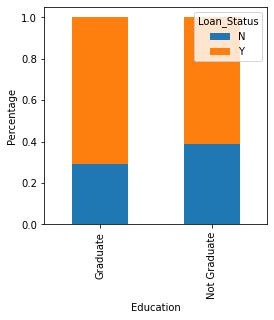

In [23]:
print(pd.crosstab(data['Education'],data['Loan_Status']))

Education=pd.crosstab(data['Education'],data['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


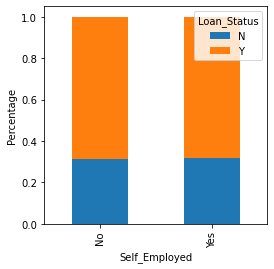

In [24]:
print(pd.crosstab(data['Self_Employed'],data['Loan_Status']))

Self_Employed=pd.crosstab(data['Self_Employed'],data['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


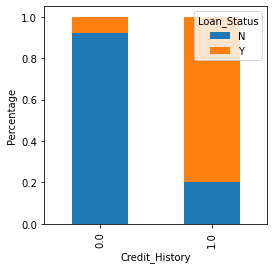

In [25]:
print(pd.crosstab(data['Credit_History'],data['Loan_Status']))

Credit_History=pd.crosstab(data['Credit_History'],data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


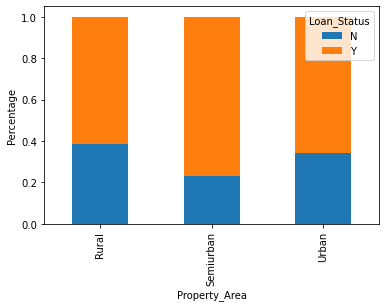

In [26]:
print(pd.crosstab(data['Property_Area'],data['Loan_Status']))

Property_Area=pd.crosstab(data['Property_Area'],data['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

### Numerical Independent Variable vs Target Variable

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


<AxesSubplot:xlabel='Loan_Status'>

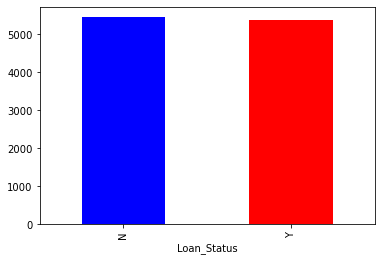

In [27]:
print(data.groupby('Loan_Status')['ApplicantIncome'].mean())

data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(color=['blue','red'])

In [28]:
# making bins for applicant income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
data['Income_bin'] = pd.cut(df['ApplicantIncome'],bins,labels=group)

In [29]:
# take a look at the dataset
data.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Low
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Average


Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very high    39   73


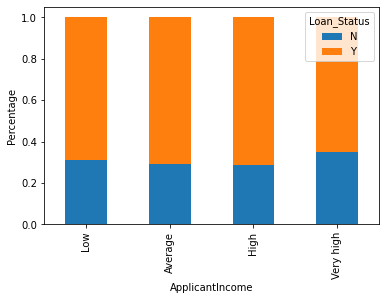

In [30]:
print(pd.crosstab(data['Income_bin'],data['Loan_Status']))

Income_bin = pd.crosstab(data['Income_bin'],data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

In [31]:
# making bins for Coapplicant income variable
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
data['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

In [32]:
# take a look at the dataset
data.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High,High
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Low,Average
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Average,Average


Loan_Status              N    Y
Coapplicant_Income_bin         
Low                      3   15
Average                 46  123
High                    24   53


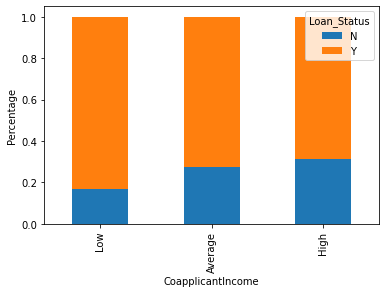

In [33]:
print(pd.crosstab(data['Coapplicant_Income_bin'],data['Loan_Status']))
# plot the chart
Coapplicant_Income_bin = pd.crosstab(data['Coapplicant_Income_bin'],data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [34]:
print(len(data[data["CoapplicantIncome"] == 0]))
"Percentage of CoapplicantIncome = 0 is:",  len(data[data["CoapplicantIncome"] == 0])/len(data["CoapplicantIncome"])

273


('Percentage of CoapplicantIncome = 0 is:', 0.44462540716612375)

In [35]:
# create a new variable Total Income
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [36]:
# making bins for Total Income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
data['Total_Income_bin'] = pd.cut(data['Total_Income'],bins,labels=group)

In [37]:
# take a look at the dataset
data.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very high
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High,High,9613.0,Very high
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Low,Average,3849.0,Average
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Average,Average,5540.0,High


Loan_Status        N    Y
Total_Income_bin         
Low               14   10
Average           32   87
High              65  159
Very high         81  166


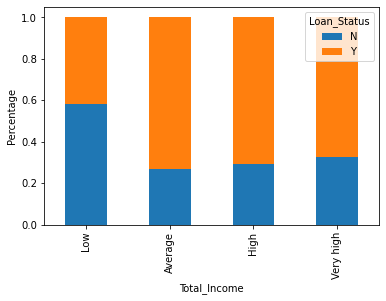

In [38]:
print(pd.crosstab(data['Total_Income_bin'],data['Loan_Status']))
# plot the chart
Total_Income_bin = pd.crosstab(data['Total_Income_bin'],data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

In [39]:
# making bins for LoanAmount variable
bins = [0,100,200,700]
group = ['Low','Average','High']
data['LoanAmount_bin'] = pd.cut(df['LoanAmount'],bins,labels=group)

In [40]:
# take a look at the dataset
data.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High,High,9613.0,Very high,High
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Low,Average,3849.0,Average,Low
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Average,Average,5540.0,High,Average


Loan_Status      N    Y
LoanAmount_bin         
Low             38   86
Average         83  207
High            27   39


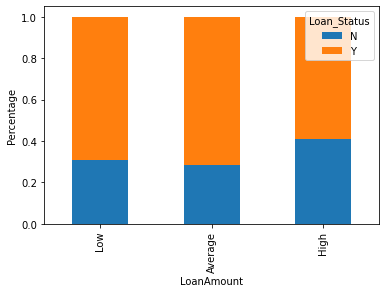

In [41]:
print(pd.crosstab(data['LoanAmount_bin'],data['Loan_Status']))
# plot the chart 
LoanAmount_bin = pd.crosstab(data['LoanAmount_bin'],data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [42]:
# before dropping
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average


In [43]:
# drop the new variable of bins
data = data.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [44]:
# after dropping
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [45]:
# replacing 3+ in Dependents variable with 3 
data['Dependents'].replace('3+', 3, inplace=True)

In [46]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
data['Loan_Status'].replace('N', 0, inplace=True)
data['Loan_Status'].replace('Y', 1, inplace=True)

In [47]:
# check the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


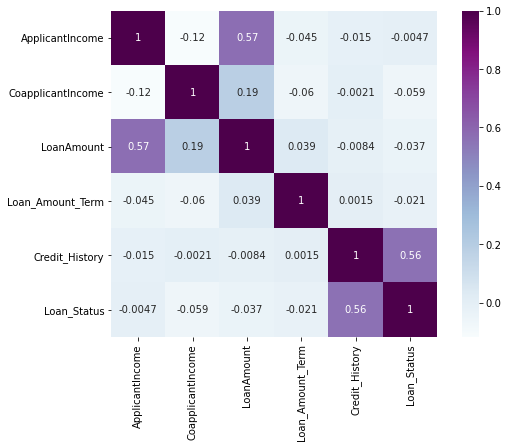

In [48]:
# calculate and visualize correlation matrix
matrix = data.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix

# Data Pre-processing

## Missing Value and Outlier Treatment

### Missing Value Imputation

In [49]:
# check for missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
# replace missing values with the mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [51]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [52]:
# replace missing value with the mode
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

In [53]:
# replace missing values with the median value due to outliers
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [54]:
# check whether all the missing values are filled in the dataset
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Outlier Treatment

Text(0.5, 1.0, 'Loan Amount')

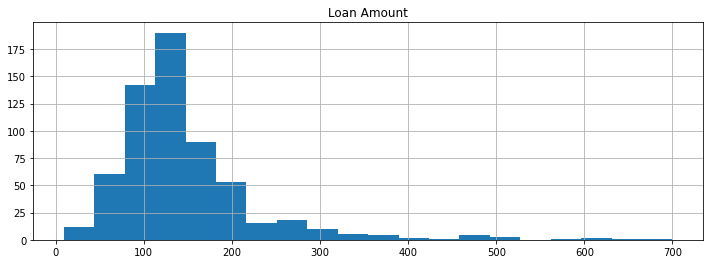

In [55]:
# before log transformation

ax1=data['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Loan Amount")

In [56]:
# Removing skewness in LoanAmount variable by log transformation
data['LoanAmount_log'] = np.log(data['LoanAmount'])

Text(0.5, 1.0, 'Loan Amount Log')

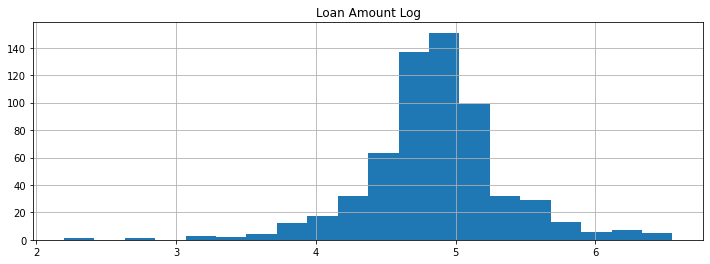

In [57]:
# after log transformation

ax1 = data['LoanAmount_log'].hist(bins=20, figsize=(12,4))
ax1.set_title("Loan Amount Log")

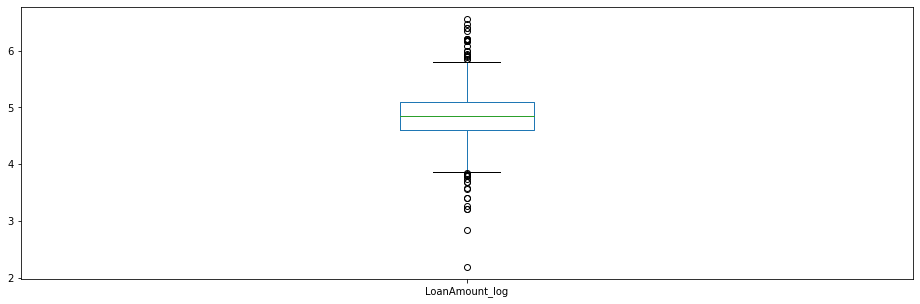

In [58]:
data['LoanAmount_log'].plot.box(figsize=(16,5))

plt.show()

# Model Development and Evaluation

# Model Building : Part 1

In [59]:
# drop Loan_ID 
data = data.drop('Loan_ID', axis=1)

In [60]:
data['Gender']= data['Gender'].map({'Male':0, 'Female':1})
data['Married']= data['Married'].map({'No':0, 'Yes':1})
data['Education']= data['Education'].map({'Not Graduate':0, 'Graduate':1})
data['Self_Employed']= data['Self_Employed'].map({'No':0, 'Yes':1})
data['Property_Area']= data['Property_Area'].map({'Rural':0, 'Semiurban':1, 'Urban':2})

In [61]:
data['Dependents'] = pd.to_numeric(data['Dependents'])
data['Property_Area'] = pd.to_numeric(data['Property_Area'])

In [62]:
# drop "Loan_Status" and assign it to target variable
X = data.drop('Loan_Status', 1)
y = data.Loan_Status

In [63]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,4.852030
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,4.852030
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,4.189655
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,4.787492
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,4.262680
610,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,3.688879
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,5.533389
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,5.231109


In [64]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [65]:
X.shape, data.shape

((614, 12), (614, 13))

# Logistic Regression using stratified k-folds cross validation 

In [66]:
#import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# import StratifiedKFold from sklearn and fit the model
from sklearn.model_selection import StratifiedKFold

In [67]:
# stratified 5 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)

acc1 = sum(mean_accuracy)/len(mean_accuracy)
print("\nMean validation accuracy: ", acc1)


1 of kfold 5
accuracy_score 0.8130081300813008

1 of kfold 5
accuracy_score 0.8373983739837398

1 of kfold 5
accuracy_score 0.7723577235772358

1 of kfold 5
accuracy_score 0.8211382113821138

1 of kfold 5
accuracy_score 0.7868852459016393

Mean validation accuracy:  0.806157536985206


The mean validation accuracy for this model turns out to be 80.4%

# Feature Engineering

In [68]:
# combine Applicant Income and Coapplicant Income into a new variable
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

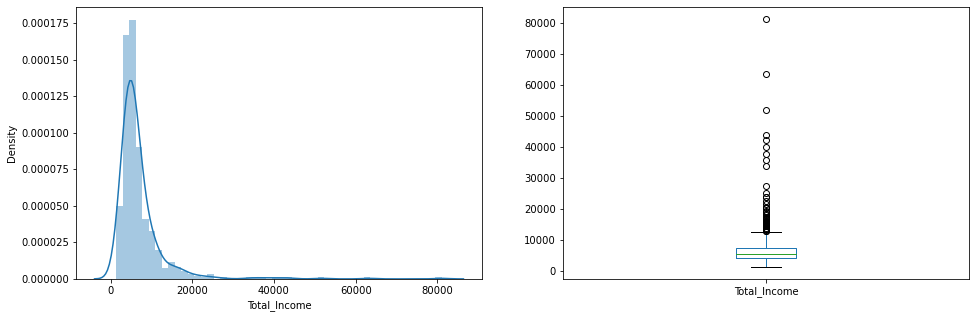

In [69]:
# check the distribution of Total Income
# before log transformation

plt.subplot(121)
sns.distplot(data['Total_Income'])

plt.subplot(122)
data['Total_Income'].plot.box(figsize=(16,5))

plt.show()

In [70]:
# log transformation
data['Total_Income_log'] = np.log(data['Total_Income'])

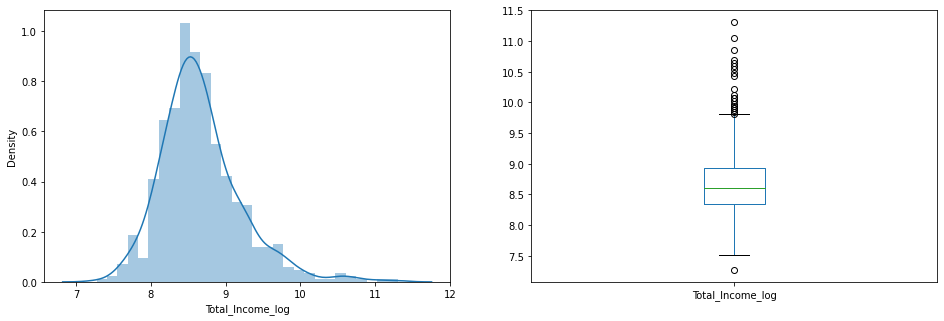

In [71]:
# after log transformation

plt.subplot(121)
sns.distplot(data['Total_Income_log'])

plt.subplot(122)
data['Total_Income_log'].plot.box(figsize=(16,5))

plt.show()

In [72]:
# create EMI feature
data['EMI'] = (data['LoanAmount']*0.09*(1.09**data['Loan_Amount_Term']))/(1.09**(data['Loan_Amount_Term']-1))

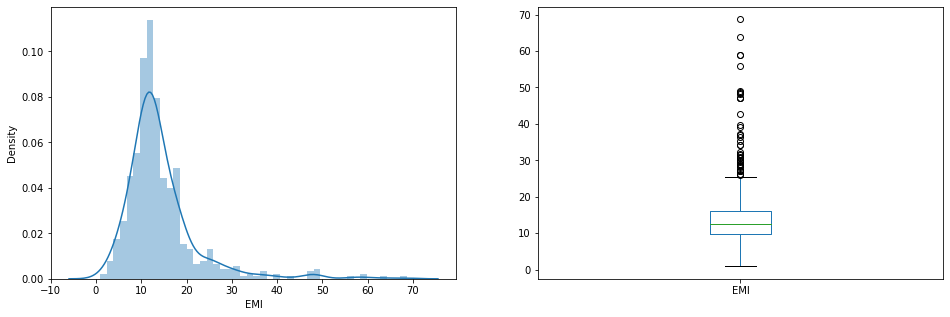

In [73]:
# check the distribution of EMI
# before log transformation

plt.subplot(121)
sns.distplot(data['EMI'])

plt.subplot(122)
data['EMI'].plot.box(figsize=(16,5))

plt.show()

In [74]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,EMI
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1,4.852030,5849.0,8.674026,12.5568
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030,6091.0,8.714568,12.5568
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655,3000.0,8.006368,6.4746
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492,4941.0,8.505323,11.7720
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760,6000.0,8.699515,13.8321


In [75]:
# log transformation
data['EMI_log'] = np.log(data['EMI'])

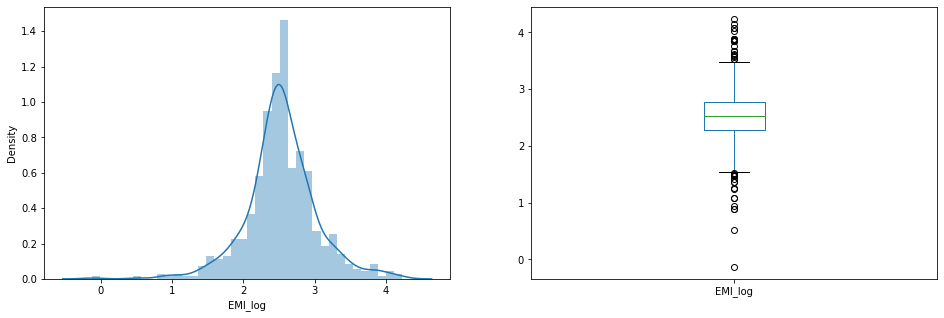

In [76]:
# check the distribution of EMI
# after log transformation

plt.subplot(121)
sns.distplot(data['EMI_log'])

plt.subplot(122)
data['EMI_log'].plot.box(figsize=(16,5))

plt.show()

In [77]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,EMI,EMI_log
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1,4.852030,5849.0,8.674026,12.5568,2.530262
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030,6091.0,8.714568,12.5568,2.530262
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655,3000.0,8.006368,6.4746,1.867887
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492,4941.0,8.505323,11.7720,2.465724
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760,6000.0,8.699515,13.8321,2.626992


In [78]:
# create new "Balance Income" variable
data['Balance Income'] = data['Total_Income'] - (data['EMI']*100) # Multiply with 100 to make the units equal 

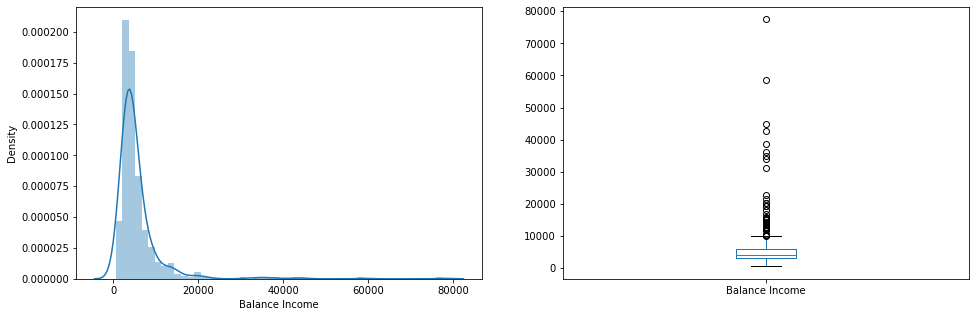

In [79]:
# check the distribution of Balance Income
# before log transformation

plt.subplot(121)
sns.distplot(data['Balance Income'])

plt.subplot(122)
data['Balance Income'].plot.box(figsize=(16,5))

plt.show()

In [80]:
# before dropping variables
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,EMI,EMI_log,Balance Income
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1,4.852030,5849.0,8.674026,12.5568,2.530262,4593.32
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030,6091.0,8.714568,12.5568,2.530262,4835.32
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655,3000.0,8.006368,6.4746,1.867887,2352.54
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492,4941.0,8.505323,11.7720,2.465724,3763.80
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760,6000.0,8.699515,13.8321,2.626992,4616.79


In [81]:
# log transformation
data['Balance_Income_log'] = np.log(data['Balance Income'])

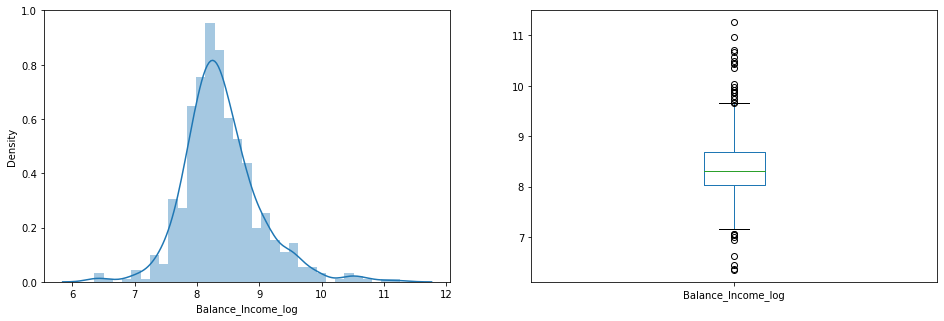

In [82]:
# check the distribution of Balance Income
# after log transformation

plt.subplot(121)
sns.distplot(data['Balance_Income_log'])

plt.subplot(122)
data['Balance_Income_log'].plot.box(figsize=(16,5))

plt.show()

In [83]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,EMI,EMI_log,Balance Income,Balance_Income_log
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1,4.852030,5849.0,8.674026,12.5568,2.530262,4593.32,8.432358
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030,6091.0,8.714568,12.5568,2.530262,4835.32,8.483703
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655,3000.0,8.006368,6.4746,1.867887,2352.54,7.763251
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492,4941.0,8.505323,11.7720,2.465724,3763.80,8.233184
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760,6000.0,8.699515,13.8321,2.626992,4616.79,8.437455


In [84]:
data = data.drop(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term'], axis=1)

In [85]:
data.head(-1)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,EMI,EMI_log,Balance Income,Balance_Income_log
0,0,0,0,1,0,128.0,1.0,2,1,4.852030,5849.0,8.674026,12.5568,2.530262,4593.32,8.432358
1,0,1,1,1,0,128.0,1.0,0,0,4.852030,6091.0,8.714568,12.5568,2.530262,4835.32,8.483703
2,0,1,0,1,1,66.0,1.0,2,1,4.189655,3000.0,8.006368,6.4746,1.867887,2352.54,7.763251
3,0,1,0,0,0,120.0,1.0,2,1,4.787492,4941.0,8.505323,11.7720,2.465724,3763.80,8.233184
4,0,0,0,1,0,141.0,1.0,2,1,4.948760,6000.0,8.699515,13.8321,2.626992,4616.79,8.437455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,1,0,1,0,108.0,1.0,0,1,4.682131,5182.0,8.552946,10.5948,2.360363,4122.52,8.324220
609,1,0,0,1,0,71.0,1.0,0,1,4.262680,2900.0,7.972466,6.9651,1.940912,2203.49,7.697798
610,0,1,3,1,0,40.0,1.0,0,1,3.688879,4106.0,8.320205,3.9240,1.367112,3713.60,8.219757
611,0,1,1,1,0,253.0,1.0,2,1,5.533389,8312.0,9.025456,24.8193,3.211622,5830.07,8.670784


In [86]:
data.to_csv("refer.csv")

In [87]:
# drop the variables
data = data.drop(['LoanAmount', 'Total_Income', 'EMI', 'Balance Income'], axis=1)

In [88]:
# after dropping variables
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income_log,EMI_log,Balance_Income_log
0,0,0,0,1,0,1.0,2,1,4.852030,8.674026,2.530262,8.432358
1,0,1,1,1,0,1.0,0,0,4.852030,8.714568,2.530262,8.483703
2,0,1,0,1,1,1.0,2,1,4.189655,8.006368,1.867887,7.763251
3,0,1,0,0,0,1.0,2,1,4.787492,8.505323,2.465724,8.233184
4,0,0,0,1,0,1.0,2,1,4.948760,8.699515,2.626992,8.437455


In [89]:
data.rename(columns = {'LoanAmount_log': 'Loan_Amount', 'Total_Income_log': 'Total_Income', 'EMI_log': 'EMI', 'Balance_Income_log': 'Balance_Income'}, inplace = True)

In [90]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Loan_Amount,Total_Income,EMI,Balance_Income
0,0,0,0,1,0,1.0,2,1,4.852030,8.674026,2.530262,8.432358
1,0,1,1,1,0,1.0,0,0,4.852030,8.714568,2.530262,8.483703
2,0,1,0,1,1,1.0,2,1,4.189655,8.006368,1.867887,7.763251
3,0,1,0,0,0,1.0,2,1,4.787492,8.505323,2.465724,8.233184
4,0,0,0,1,0,1.0,2,1,4.948760,8.699515,2.626992,8.437455


# Model Building : Part 2

In [91]:
# drop "Loan_Status" and assign it to target variable
X = data.drop('Loan_Status', axis=1)
# Save target variable in separate dataset
y = data.Loan_Status                

# Logistic Regression

In [92]:
# stratified 10 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model1 = LogisticRegression(random_state=1)
    model1.fit(xtr, ytr)
    pred_test = model1.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1
    
acc2 = sum(mean_accuracy)/len(mean_accuracy)
print("\nMean validation accuracy: ", acc2)


1 of kfold 10
accuracy_score 0.7903225806451613

2 of kfold 10
accuracy_score 0.8387096774193549

3 of kfold 10
accuracy_score 0.8548387096774194

4 of kfold 10
accuracy_score 0.8064516129032258

5 of kfold 10
accuracy_score 0.8360655737704918

6 of kfold 10
accuracy_score 0.7540983606557377

7 of kfold 10
accuracy_score 0.7868852459016393

8 of kfold 10
accuracy_score 0.8360655737704918

9 of kfold 10
accuracy_score 0.8032786885245902

10 of kfold 10
accuracy_score 0.7868852459016393

Mean validation accuracy:  0.8093601269169752


we got an accuracy of 80.9%. So we can infer feature engineering has improved the model. 

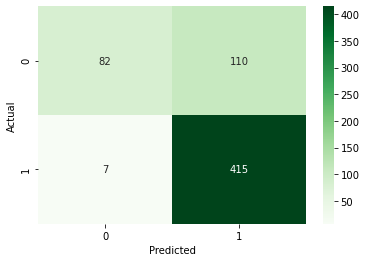

In [93]:
# To calculate the confusion matrix
from sklearn.metrics import confusion_matrix

# Initialize the array to zero which will store the confusion matrix
array = [[0,0],[0,0]]

kf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

# For each train-test split: train, predict and compute the confusion matrix
for train_index, test_index in kf.split(X,y):
    # Train test split
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    # Train the model
    model1.fit(xtr, ytr)
    # Calculate the confusion matrix
    c = confusion_matrix(yvl, model1.predict(xvl))
    # Add the score to the previous confusion matrix of previous model
    array = array + c
# Create a pandas dataframe that stores the output of confusion matrix        
df = pd.DataFrame(array)

# Plot the heatmap
sns.heatmap(df, annot=True, cmap='Greens', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree 

In [94]:
# import library
from sklearn import tree

In [95]:
# stratified 5 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model2 = tree.DecisionTreeClassifier(random_state=1)
    model2.fit(xtr, ytr)
    pred_test = model2.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
acc3 = sum(mean_accuracy)/len(mean_accuracy)
print("\nMean validation accuracy: ", acc3)


1 of kfold 5
accuracy_score 0.7723577235772358

2 of kfold 5
accuracy_score 0.7073170731707317

3 of kfold 5
accuracy_score 0.6991869918699187

4 of kfold 5
accuracy_score 0.6829268292682927

5 of kfold 5
accuracy_score 0.6639344262295082

Mean validation accuracy:  0.7051446088231375


The mean validation accuracy for this model is 70.5%, which is lower than Logistic Regression.

# Random Forest

In [96]:
# import library
from sklearn.ensemble import RandomForestClassifier

In [97]:
# stratified 10 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]  
    model3 = RandomForestClassifier(random_state=1, max_depth=10, n_estimators=10)
    model3.fit(xtr, ytr)
    pred_test = model3.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
acc4 = sum(mean_accuracy)/len(mean_accuracy)
print("\nMean validation accuracy: ", acc4)


1 of kfold 10
accuracy_score 0.7903225806451613

2 of kfold 10
accuracy_score 0.8225806451612904

3 of kfold 10
accuracy_score 0.8548387096774194

4 of kfold 10
accuracy_score 0.7903225806451613

5 of kfold 10
accuracy_score 0.8360655737704918

6 of kfold 10
accuracy_score 0.7868852459016393

7 of kfold 10
accuracy_score 0.7704918032786885

8 of kfold 10
accuracy_score 0.7868852459016393

9 of kfold 10
accuracy_score 0.7540983606557377

10 of kfold 10
accuracy_score 0.7704918032786885

Mean validation accuracy:  0.7962982548915918


The mean validation accuracy for this model is 79.6%.

## GridSearchCV 

In [98]:
# import library
from sklearn.model_selection import GridSearchCV

In [99]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [100]:
# default 3-fold cross validation, cv=3
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

In [101]:
# split the data
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)

In [102]:
# fit the grid search model
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [103]:
# estimate the optimized value
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=121, random_state=1)

So, the optimized value for the max_depth variable is 3 and for n_estimator is 121. Now let’s build the model using these optimized values.

In [104]:
# stratified 10 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model4 = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=121)
    model4.fit(xtr, ytr)
    pred_test = model4.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
acc5 = sum(mean_accuracy)/len(mean_accuracy)
print("\nMean validation accuracy: ", acc5)


1 of kfold 10
accuracy_score 0.8064516129032258

2 of kfold 10
accuracy_score 0.8387096774193549

3 of kfold 10
accuracy_score 0.8548387096774194

4 of kfold 10
accuracy_score 0.8064516129032258

5 of kfold 10
accuracy_score 0.8524590163934426

6 of kfold 10
accuracy_score 0.7540983606557377

7 of kfold 10
accuracy_score 0.7868852459016393

8 of kfold 10
accuracy_score 0.8032786885245902

9 of kfold 10
accuracy_score 0.8032786885245902

10 of kfold 10
accuracy_score 0.7868852459016393

Mean validation accuracy:  0.8093336858804865


The mean validation accuracy has improved from 79.6% to 80.9%.

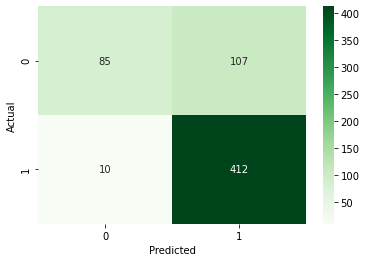

In [105]:
# To calculate the confusion matrix
from sklearn.metrics import confusion_matrix

# Initialize the array to zero which will store the confusion matrix
array = [[0,0],[0,0]]

kf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

# For each train-test split: train, predict and compute the confusion matrix
for train_index, test_index in kf.split(X,y):
    # Train test split
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    # Train the model
    model4.fit(xtr, ytr)
    # Calculate the confusion matrix
    c = confusion_matrix(yvl, model4.predict(xvl))
    # Add the score to the previous confusion matrix of previous model
    array = array + c
# Create a pandas dataframe that stores the output of confusion matrix        
df = pd.DataFrame(array)

# Plot the heatmap
sns.heatmap(df, annot=True, cmap='Greens', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# XGBoost

In [106]:
# import library
from xgboost import XGBClassifier

In [107]:
# stratified 10 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model5 = XGBClassifier(random_state=1, n_estimators=50, max_depth=4)
    model5.fit(xtr, ytr)
    pred_test = model5.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
 
acc6 = sum(mean_accuracy)/len(mean_accuracy)
print("\nMean validation accuracy: ", acc6)


1 of kfold 10
accuracy_score 0.8225806451612904

2 of kfold 10
accuracy_score 0.8225806451612904

3 of kfold 10
accuracy_score 0.8709677419354839

4 of kfold 10
accuracy_score 0.7741935483870968

5 of kfold 10
accuracy_score 0.819672131147541

6 of kfold 10
accuracy_score 0.7540983606557377

7 of kfold 10
accuracy_score 0.7868852459016393

8 of kfold 10
accuracy_score 0.819672131147541

9 of kfold 10
accuracy_score 0.7704918032786885

10 of kfold 10
accuracy_score 0.7868852459016393

Mean validation accuracy:  0.8028027498677947


The mean validation accuracy for this model is 80.2%.

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters.

In [108]:
# import library
from sklearn.model_selection import GridSearchCV

In [109]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [110]:
# default 3-fold cross validation, cv=3
grid_search = GridSearchCV(XGBClassifier(random_state=1), paramgrid)

In [111]:
# split the data
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)

In [112]:
# fit the grid search model
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=XGBClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [113]:
# estimate the optimized value
grid_search.best_estimator_

XGBClassifier(max_depth=1, n_estimators=181, random_state=1)

So, the optimized value for the max_depth variable is 1 and for n_estimator is 181. Now let’s build the model using these optimized values.

In [114]:
# stratified 10 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model6 = XGBClassifier(random_state=1, n_estimators=181, max_depth=1)
    model6.fit(xtr, ytr)
    pred_test = model6.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
acc7 = sum(mean_accuracy)/len(mean_accuracy)    
print("\nMean validation accuracy: ", acc7)


1 of kfold 10
accuracy_score 0.7903225806451613

2 of kfold 10
accuracy_score 0.8225806451612904

3 of kfold 10
accuracy_score 0.8548387096774194

4 of kfold 10
accuracy_score 0.8064516129032258

5 of kfold 10
accuracy_score 0.8524590163934426

6 of kfold 10
accuracy_score 0.7540983606557377

7 of kfold 10
accuracy_score 0.7868852459016393

8 of kfold 10
accuracy_score 0.8032786885245902

9 of kfold 10
accuracy_score 0.8032786885245902

10 of kfold 10
accuracy_score 0.7704918032786885

Mean validation accuracy:  0.8044685351665786


The mean validation accuracy has improved from 80.2% to 80.4%. 

# Feature Importance

<AxesSubplot:>

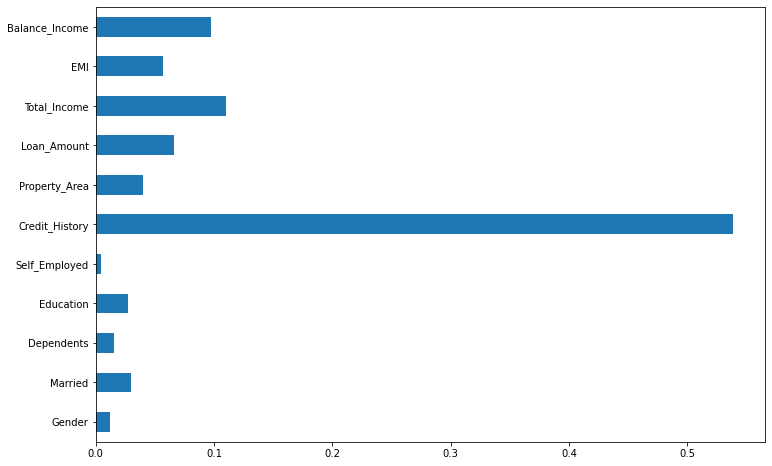

In [115]:
# extract feature importances, convert into a Series
importances = pd.Series(model4.feature_importances_, index=X.columns)

# plot the horizontal bar chart
importances.plot(kind='barh', figsize=(12,8))

We can see that Credit_History is the most important feature followed by Total Income, Balance Income, Loan Amount, EMI.      So, feature engineering helped us in predicting our target variable.

In [116]:
# Arranging the Accuracy results
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forrest', 'XGBoost', 'Decision Tree'],
    'Score': [acc2*100, acc5*100, acc7*100, acc3*100]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,80.936013
1,Random Forrest,80.933369
2,XGBoost,80.446854
3,Decision Tree,70.514461


In [117]:
# saving the model 
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(model1, pickle_out) 
pickle_out.close()

In [ ]:
!streamlit run app.py

In [ ]:
from pyngrok import ngrok
 
public_url = ngrok.connect('8501')
public_url